In [1]:
import pandas as pd
import numpy as np
from PyPDF2 import PdfReader
import re

In [2]:
claims = pd.read_excel(r'data\Tremfya_email_claims.xlsx')
claims.head()


,Unnamed: 0
0,[HEAD]\nWhen your patient presents with modera...
1,[VISUAL COPY/DISCLAIMER] [ART NOTE: appears wi...
2,[SUBHEAD] [Leveraged from eFile 121146]\nHEAD...
3,"[COPY]\nIn a phase 3, multicentre, randomized,..."
4,<“PASI 90” icon> TREMFYA® demonstrated a super...


In [3]:
# using regex extract all text not between []
ext_claims = []
ext_refs = []
for i in range(len(claims)):
    my_str = claims.iloc[i].squeeze()
    ext_claims.append(re.sub(r'\[.*?\]', '', my_str))
    ext_refs.append(re.findall(r'\[.*?\]', my_str)[-1])

claims['text'] = ext_claims
claims['text'] = claims['text'].str.replace('\n', '').str.strip()
claims['reference'] = ext_refs
claims

,Unnamed: 0,text,reference
0,[HEAD]\nWhen your patient presents with modera...,When your patient presents with moderate-to-se...,[PM p. 4A]
1,[VISUAL COPY/DISCLAIMER] [ART NOTE: appears wi...,TREMFYA®/TREMFYA ONE-PRESS® (guselkumab inject...,[PM p. 4A]
2,[SUBHEAD] [Leveraged from eFile 121146]\nHEAD...,HEAD-TO-HEAD RESULTS: TREMFYA® 48-WEEK EFFICAC...,"[ECLIPSE p 5A, 5B, 6A]"
3,"[COPY]\nIn a phase 3, multicentre, randomized,...","In a phase 3, multicentre, randomized, double-...",[COPY]
4,<“PASI 90” icon> TREMFYA® demonstrated a super...,<“PASI 90” icon> TREMFYA® demonstrated a super...,"[ECLIPSE p 5A, 5B, 6A]"
5,[CALL-OUT] [ART NOTE: Distinct visual separati...,TREMFYA®: THE FIRST IL-23 INHIBITOR WITH INDIC...,"[DOF Letter, March 2, 2021, p1A]"
6,[HIGH LEVEL BALANCE]\nIndication not previousl...,Indication not previously mentioned and clinic...,[PM p. 4B]
7,Do not initiate treatment in patients with any...,Do not initiate treatment in patients with any...,[PM p. 7A]
8,Discontinue treatment if patient develops a se...,Discontinue treatment if patient develops a se...,[PM p. 7B]
9,Evaluate patients for tuberculosis infection p...,Evaluate patients for tuberculosis infection p...,[PM p. 7C]


In [4]:
# Let's read page 4 of the pdf
reader = PdfReader('data/MASTER_TremfyaPM_08Nov2022_annotated.pdf')
page = reader.pages[3]
print(page.extract_text())

TRE11082022CPM_SNDS 259046.docx
EDMS -ERI-121169578 v15.0 Page 4of 47PART I: HEA LTH PROFESSIONA L INFORMA TION
1INDICA TIONS
Plaque Psoriasis
TREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for:
the treatment of adult patients with moderate -to-severe plaque psoriasis who are 
candidates for systemic therapy or phototherapy. 
Psoriatic A rthritis
TREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for: 
the treatment of adult patients wit h active psoriatic arthritis. TREMFYA®/TREMFYA One -
Press®can be used alone or in combination with a conventional disease -modifying 
antirheumatic drug (cDMARD) (e.g., methotrexate).
1.1 Pediatrics
The safety and efficacy of TREMFYA®/TREMFYA One -Press®in pediatric patients have not 
been evaluated.
1.2 Geriatrics
Of the 3406 plaque psoriasis and psoriatic arthritis patients exposed to TREMFYA®/TREMFYA 
One-Press®in Phase 2 and Phase 3 clinical trials, a limited number of patients were 65 years or 
older (n = 185, 5%) 

> Playing around with some spacy -- probably not needed at this stage

In [6]:
page.extract_text().split('.\n')

['TRE11082022CPM_SNDS 259046.docx\nEDMS -ERI-121169578 v15.0 Page 4of 47PART I: HEA LTH PROFESSIONA L INFORMA TION\n1INDICA TIONS\nPlaque Psoriasis\nTREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for:\n\uf0b7the treatment of adult patients with moderate -to-severe plaque psoriasis who are \ncandidates for systemic therapy or phototherapy. \nPsoriatic A rthritis\nTREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for: \n\uf0b7the treatment of adult patients wit h active psoriatic arthritis. TREMFYA®/TREMFYA One -\nPress®can be used alone or in combination with a conventional disease -modifying \nantirheumatic drug (cDMARD) (e.g., methotrexate)',
 '1.1 Pediatrics\nThe safety and efficacy of TREMFYA®/TREMFYA One -Press®in pediatric patients have not \nbeen evaluated',
 '1.2 Geriatrics\nOf the 3406 plaque psoriasis and psoriatic arthritis patients exposed to TREMFYA®/TREMFYA \nOne-Press®in Phase 2 and Phase 3 clinical trials, a limited number of patients were 

In [7]:
[part.replace('\n', ' ') for part in page.extract_text().split('.\n')]

['TRE11082022CPM_SNDS 259046.docx EDMS -ERI-121169578 v15.0 Page 4of 47PART I: HEA LTH PROFESSIONA L INFORMA TION 1INDICA TIONS Plaque Psoriasis TREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for: \uf0b7the treatment of adult patients with moderate -to-severe plaque psoriasis who are  candidates for systemic therapy or phototherapy.  Psoriatic A rthritis TREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for:  \uf0b7the treatment of adult patients wit h active psoriatic arthritis. TREMFYA®/TREMFYA One - Press®can be used alone or in combination with a conventional disease -modifying  antirheumatic drug (cDMARD) (e.g., methotrexate)',
 '1.1 Pediatrics The safety and efficacy of TREMFYA®/TREMFYA One -Press®in pediatric patients have not  been evaluated',
 '1.2 Geriatrics Of the 3406 plaque psoriasis and psoriatic arthritis patients exposed to TREMFYA®/TREMFYA  One-Press®in Phase 2 and Phase 3 clinical trials, a limited number of patients were 65 years or  ol

In [12]:
# manually cleaned it a bit to make sure headlines are separated
corpus = [
'TRE11082022CPM_SNDS 259046.docx EDMS -ERI-121169578 v15.0 Page 4of 47',
'PART I: HEALTH PROFESSIONAL INFORMATION 1 INDICATIONS',
'Plaque Psoriasis TREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for: the treatment of adult patients with moderate -to-severe plaque psoriasis who are  candidates for systemic therapy or phototherapy.',
'Psoriatic A rthritis TREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for:  the treatment of adult patients wit h active psoriatic arthritis. TREMFYA®/TREMFYA One - Press®can be used alone or in combination with a conventional disease -modifying  antirheumatic drug (cDMARD) (e.g., methotrexate)',
'1.1 Pediatrics The safety and efficacy of TREMFYA®/TREMFYA One -Press®in pediatric patients have not  been evaluated',
'1.2 Geriatrics Of the 3406 plaque psoriasis and psoriatic arthritis patients exposed to TREMFYA®/TREMFYA  One-Press®in Phase 2 and Phase 3 clinical trials, a limited number of patients were 65 years or  older (n = 185, 5%) or 75 years and older (n=13, 0.4%). Thus, data in these age groups are  limited (see 10 CLINICA L PHA RMACOLOGY )',
'2 CONTRA INDICATIONS TREMFYA®/TREMFYA One -Press®is contraindicated in patients with known serious  hypersensitivity to guselkumab or any of the components. For a complete listing of components,  see the 6 DOSA GE FORMS, STRENGTHS, COMPOSITION A ND PA CKAGING section',
'4 DOSAGE AND ADMINISTR ATION TREMFYA®/TREMFYA One-Press®is administered by subcutaneous injection',
'4.1 Dosing Considerations TREMFYA®/TREMFYA One -Press®is intended for use under the guidance and supervision of a  physician.  TREMFYA®/TREMFYA One -Press®may be administered by a healthcare professional, or a  patient or caregiver may administer the injection after proper training in subcutaneous injection  technique.  4.2 Recommended Dose and Dosage A djustment Plaque psoriasis The recommended dose of TREMFYA®/TREMFYA One -Press®is 100 mg to be given as '
]

## A sample of the original pdf page:

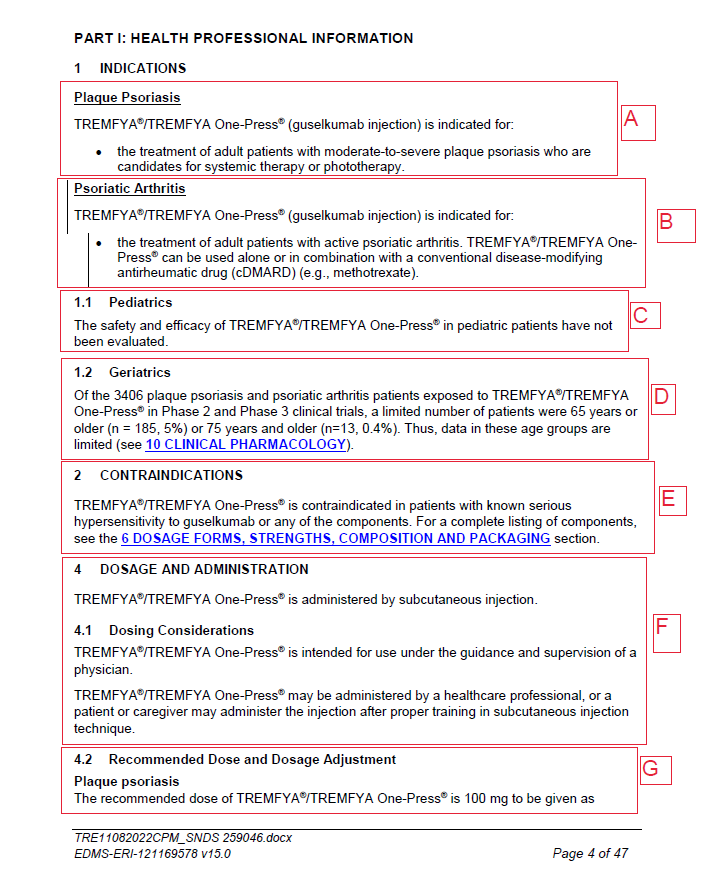

In [14]:
this_page_claims = claims.iloc[[0,1,6], :]
display(this_page_claims)
queries = this_page_claims['text'].tolist()
# these are the claims we want to match from the email data

,Unnamed: 0,text,reference
0,[HEAD]\nWhen your patient presents with modera...,When your patient presents with moderate-to-se...,[PM p. 4A]
1,[VISUAL COPY/DISCLAIMER] [ART NOTE: appears wi...,TREMFYA®/TREMFYA ONE-PRESS® (guselkumab inject...,[PM p. 4A]
6,[HIGH LEVEL BALANCE]\nIndication not previousl...,Indication not previously mentioned and clinic...,[PM p. 4B]


# Sentence-BERT

https://arxiv.org/abs/1908.10084


In [15]:
"""
This is a simple application for sentence embeddings: semantic search

We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.

This script outputs for various queries the top 5 most similar sentences in the corpus.
"""

from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer("all-MiniLM-L6-v2")


corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """





Query: When your patient presents with moderate-to-severe plaque psoriasis, SAY TREMFYA®2

Top 5 most similar sentences in corpus:
1.2 Geriatrics Of the 3406 plaque psoriasis and psoriatic arthritis patients exposed to TREMFYA®/TREMFYA  One-Press®in Phase 2 and Phase 3 clinical trials, a limited number of patients were 65 years or  older (n = 185, 5%) or 75 years and older (n=13, 0.4%). Thus, data in these age groups are  limited (see 10 CLINICA L PHA RMACOLOGY ) (Score: 0.7980)
Plaque Psoriasis TREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for: the treatment of adult patients with moderate -to-severe plaque psoriasis who are  candidates for systemic therapy or phototherapy. (Score: 0.7039)
Psoriatic A rthritis TREMFYA®/TREMFYA One -Press®(guselkumab injection) is indicated for:  the treatment of adult patients wit h active psoriatic arthritis. TREMFYA®/TREMFYA One - Press®can be used alone or in combination with a conventional disease -modifying  antirheumatic dr

In [16]:
corpus[1]

'PART I: HEALTH PROFESSIONAL INFORMATION 1 INDICATIONS'

# PART 2: Reading in paper pdf

In [24]:
# Let's read page 4 of the pdf
reader = PdfReader('./data/Reich et al. 2019 - ECLIPSE.pdf')
page = reader.pages[0]
# print(page.extract_text())
# write text to file
with open('data/ECLIPSE.txt', 'w') as f:
    f.write(page.extract_text())

In [44]:
import re

# Sample string with '\n' in the middle of sentences and paragraphs
text = "This is a sentence.\nThis is a continuation of the sentence.\n\nThis is a new paragraph. While one of the other things\nmentioned is a new paragraph, this is not"
# Replace '\n' that is not followed by a whitespace or another '\n'
cleaned_text = re.sub(r'\n(?!\s|\n)', ' ', text)

print(cleaned_text)

This is a sentence. This is a continuation of the sentence.
 This is a new paragraph. While one of the other things mentioned is a new paragraph, this is not


In [45]:
text = page.extract_text()
# Replace '\n' that is not followed by a whitespace or another '\n'
cleaned_text = re.sub(r'\n(?!\s|\n)', ' ', text)
print(cleaned_text)

Articleswww.thelancet.com   Published online August 8, 2019   http://dx.doi.org/10.1016/S0140-6736(19)31773-8  1Guselkumab versus secukinumab for the treatment of  moderate-to-severe psoriasis (ECLIPSE): results from a phase 3, randomised controlled trial Kristian Reich, April W Armstrong, Richard G Langley, Susan Flavin, Bruce Randazzo, Shu Li, Ming-Chun Hsu, Patrick Branigan, Andrew Blauvelt Summary Background Antibodies targeting interleukin (IL)-23 and IL-17A effectively treat moderate-to-severe psoriasis.  ECLIPSE is the first comparator study of an IL-23p19 inhibitor, guselkumab, versus an IL-17A inhibitor, secukinumab. The primary objective of this study was to show superiority of clinical response at week 48 for guselkumab versus secukinumab. Methods In this phase 3, multicentre, double-blind, randomised, comparator-controlled trial at 142 outpatient  clinical sites in nine countries (Australia, Canada, Czech Republic, France, Germany, Hungary, Poland, Spain, and  the USA), eli

In [46]:
corpus = cleaned_text.split('. ')
corpus

['Articleswww.thelancet.com   Published online August 8, 2019   http://dx.doi.org/10.1016/S0140-6736(19)31773-8  1Guselkumab versus secukinumab for the treatment of  moderate-to-severe psoriasis (ECLIPSE): results from a phase 3, randomised controlled trial Kristian Reich, April W Armstrong, Richard G Langley, Susan Flavin, Bruce Randazzo, Shu Li, Ming-Chun Hsu, Patrick Branigan, Andrew Blauvelt Summary Background Antibodies targeting interleukin (IL)-23 and IL-17A effectively treat moderate-to-severe psoriasis',
 ' ECLIPSE is the first comparator study of an IL-23p19 inhibitor, guselkumab, versus an IL-17A inhibitor, secukinumab',
 'The primary objective of this study was to show superiority of clinical response at week 48 for guselkumab versus secukinumab',
 'Methods In this phase 3, multicentre, double-blind, randomised, comparator-controlled trial at 142 outpatient  clinical sites in nine countries (Australia, Canada, Czech Republic, France, Germany, Hungary, Poland, Spain, and  th

> Note: This is a work in progress. PDF parsing is not the best at this point. 

- Bad parsing: approximate  ly 
- not being able to read pdf in sections (just pages) is a bit of a problem.


In [96]:
len(reader.pages)
corpus_all = []
corpus_pages = []
for page_number in range(len(reader.pages)):
    text = reader.pages[page_number].extract_text()
    # Replace '\n' that is not followed by a whitespace or another '\n'
    cleaned_text = re.sub(r'\n(?!\s|\n)', ' ', text)
    cleaned_text = cleaned_text.strip()
    corpus = cleaned_text.split('. ')
    for i in range(len(corpus)):
        corpus[i] = corpus[i].strip()
    corpus_all.extend(corpus)
    corpus_pages.extend([(page_number+1)] * len(corpus))  

assert len(corpus_all) == len(corpus_pages)

In [99]:
eclispse_claims = [
    'The primary endpoint was the proportion of patients in each group who achieved a PASI 90 response at week 48.',
    'HEAD-TO-HEAD RESULTS: TREMFYA® 48-WEEK EFFICACY DATA VS. COSENTYX',
    'TREMFYA® demonstrated a superior PASI 90 response vs. COSENTYX at Week 48 (ITT population)',
    'Patients were ≥18 years with moderate-to-severe plaque psoriasis (PASI ≥12, Investigator’s Global Assessment  score ≥3, body surface area involvement ≥10% for ≥6 months) and were candidates for phototherapy or systemic therapy. Patients received either TREMFYA® 100 mg subcutaneously (SC) at Weeks 0, 4, 12, and every 8 weeks thereafter until Week 44 or COSENTYX 300 mg administered as two SC injections at Weeks 0, 1, 2, 3, and 4, and every 4 weeks thereafter until Week 44. Primary endpoint was the proportion of patients in each group who achieved a PASI 90 response at Week 48']


embedder = SentenceTransformer("all-MiniLM-L6-v2")

corpus_embeddings = embedder.encode(corpus_all, convert_to_tensor=True)


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus_all))
for query in eclispse_claims:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(f"Page #{corpus_pages[idx]}: ",corpus_all[idx], "(Score: {:.4f})".format(score))






Query: The primary endpoint was the proportion of patients in each group who achieved a PASI 90 response at week 48.

Top 5 most similar sentences in corpus:
Page #4:  Articles4 www.thelancet.com   Published online August 8, 2019   http://dx.doi.org/10.1016/S0140-6736(19)31773-8Outcomes The primary endpoint was the proportion of patients in  each group who achieved a PASI 90 response at week 48 (Score: 0.9394)
Page #4:  Major secondary endpoints were the proportions of  patients in each group who achieved a PASI 75 response at both week 12 and week 48, a PASI 90 response at week 12, a PASI 75 response at week 12, a PASI 100 response at week 48, an IGA score of 0 (cleared) at week 48, and an IGA score of 0 (cleared) or 1 (minimal) at week 48 (Score: 0.8571)
Page #4:  Other secondary endpoints were the proportion of patients achieving a PASI 90 response, a PASI 100 response, an IGA score of 0 (cleared), and an IGA score of 0 (cleared) or 1 (minimal) over time until week 48 (Score: 0.

# New approach using langchain

In [ ]:
from PyPDF2 import PdfReader
from pdfplumber import pdf
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer, util
import time
from gpt4all import GPT4All

from numba import jit, cuda
import numpy as np  


import sys,time,random

def progressBar(count_value, total, suffix=''):
    bar_length = 100
    filled_up_Length = int(round(bar_length* count_value / float(total)))
    percentage = round(100.0 * count_value/float(total),1)
    bar = '=' * filled_up_Length + '-' * (bar_length - filled_up_Length)
    sys.stdout.write('[%s] %s%s ...%s\r' %(bar, percentage, '%', suffix))
    sys.stdout.flush()

# Loading the llm model here
llm = GPT4All("orca-mini-3b.ggmlv3.q4_0.bin")

def get_query():
    query = input("Enter your question\n")
    progressBar(1, 7)
    return query


def load_split_pdf(pdf_path):
    pdf_loader = PdfReader(open(pdf_path, "rb"))
    pdf_text = ""
    for page_num in range(len(pdf_loader.pages)):
        pdf_page = pdf_loader.pages[page_num]
        pdf_text += pdf_page.extract_text()
    progressBar(2, 7)
    return pdf_text


def split_text_using_RCTS(pdf_text):
    text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2048,
    chunk_overlap=64
    )
    split_texts = text_splitter.split_text(pdf_text)
    paragraphs = []
    for text in split_texts:
        paragraphs.extend(text.split('\n')) 
    progressBar(3, 7)
    return paragraphs


def Initialize_sentence_transformer():
    model_name = "sentence-transformers/all-MiniLM-L6-v2"
    embeddings = SentenceTransformer(model_name)
    progressBar(4, 7)
    return embeddings


def encode_each_paragraph(paragraphs, embeddings):
    responses = []
    for paragraph in paragraphs:
        response = embeddings.encode([paragraph], convert_to_tensor=True)
        responses.append((paragraph, response))
    progressBar(5, 7)
    return responses


def choose_most_relevant_sentence(embeddings, responses, query):
    query_embedding = embeddings.encode([query], convert_to_tensor=True)
    best_response = None
    best_similarity = -1.0
    answers = []

    for paragraph, response in responses:
        
        similarity = util.pytorch_cos_sim(query_embedding, response).item()
        
        if similarity >= 0.6:
            
            # count += 1
            
            answers.append(paragraph)
    answer = "\n".join(answers)
    progressBar(6, 7)
    return answer


def query_the_llm(answer, llm_model, query):
    prompt_message = answer + "\n" + query

    final_response = llm_model.generate(prompt=prompt_message)
    
    return final_response

    

def main(llm):
    start_time = time.time()
    
    pdf_path = ""
    
    query = get_query()
    
    pdf_text = load_split_pdf(pdf_path)
    
    paragraphs = split_text_using_RCTS(pdf_text)
    
    embeddings = Initialize_sentence_transformer()
    
    responses = encode_each_paragraph(paragraphs=paragraphs, embeddings=embeddings)
    
    answer = choose_most_relevant_sentence(embeddings=embeddings, responses=responses, query=query)
    
    final_response = query_the_llm(answer=answer, llm_model=llm, query=query)
    
    print ("The answer from model is\n", final_response)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"Execution time: {elapsed_time/60} minutes \n")
    
    progressBar(7, 7)

main(llm)

In [3]:
from PyPDF2 import PdfReader
from pdfplumber import pdf
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer, util
import time
# from gpt4all import GPT4All

# from numba import jit, cuda
import numpy as np  


import sys,time,random

def progressBar(count_value, total, suffix=''):
    bar_length = 100
    filled_up_Length = int(round(bar_length* count_value / float(total)))
    percentage = round(100.0 * count_value/float(total),1)
    bar = '=' * filled_up_Length + '-' * (bar_length - filled_up_Length)
    sys.stdout.write('[%s] %s%s ...%s\r' %(bar, percentage, '%', suffix))
    sys.stdout.flush()

# Loading the llm model here
# llm = GPT4All("orca-mini-3b.ggmlv3.q4_0.bin")

def get_query():
    query = input("Enter your question\n")
    progressBar(1, 7)
    return query


def load_split_pdf(pdf_path):
    pdf_loader = PdfReader(open(pdf_path, "rb"))
    pdf_text = ""
    for page_num in range(len(pdf_loader.pages)):
        pdf_page = pdf_loader.pages[page_num]
        pdf_text += pdf_page.extract_text()
    progressBar(2, 7)
    return pdf_text


def split_text_using_RCTS(pdf_text):
    text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2048,
    chunk_overlap=64
    )
    split_texts = text_splitter.split_text(pdf_text)
    paragraphs = []
    for text in split_texts:
        paragraphs.extend(text.split('\n')) 
    progressBar(3, 7)
    return paragraphs


def Initialize_sentence_transformer():
    model_name = "sentence-transformers/all-MiniLM-L6-v2"
    embeddings = SentenceTransformer(model_name)
    progressBar(4, 7)
    return embeddings


def encode_each_paragraph(paragraphs, embeddings):
    responses = []
    for paragraph in paragraphs:
        response = embeddings.encode([paragraph], convert_to_tensor=True)
        responses.append((paragraph, response))
    progressBar(5, 7)
    return responses


In [ ]:

pdf_path = ""
query = get_query()
pdf_text = load_split_pdf(pdf_path)
paragraphs = split_text_using_RCTS(pdf_text)
embeddings = Initialize_sentence_transformer()
responses = encode_each_paragraph(paragraphs=paragraphs, embeddings=embeddings)
answer = choose_most_relevant_sentence(embeddings=embeddings, responses=responses, query=query)

# Spacy pdf reader

In [6]:
import spacy
from spacypdfreader.spacypdfreader import pdf_reader
pdf_path = 'data/MASTER_TremfyaPM_08Nov2022.pdf'

nlp = spacy.load('en_core_web_sm')
doc = pdf_reader(pdf_path, nlp)

# Get the page number of any token.
print(doc[0]._.page_number)  # 1
print(doc[-1]._.page_number) # 4

# Get page meta data about the PDF document.
print(doc._.pdf_file_name)   # 'tests/data/test_pdf_01.pdf'
print(doc._.page_range)      # (1, 4)
print(doc._.first_page)      # 1
print(doc._.last_page)       # 4

# Get all of the text from a specific PDF page.
print(doc._.page(4))         # 'able to display the destination page (unless...'


1
47
data\MASTER_TremfyaPM_08Nov2022.pdf
(1, 47)
1
47
PART I: HEALTH PROFESSIONAL INFORMATION

1

INDICATIONS

Plaque Psoriasis

Psoriatic Arthritis





1.1 Pediatrics

1.2 Geriatrics

TREMFYA®/TREMFYA One-Press® (guselkumab injection) is indicated for:

the treatment of adult patients with moderate-to-severe plaque psoriasis who are 
candidates for systemic therapy or phototherapy. 

TREMFYA®/TREMFYA One-Press® (guselkumab injection) is indicated for: 

the treatment of adult patients with active psoriatic arthritis. TREMFYA®/TREMFYA One-
Press® can be used alone or in combination with a conventional disease-modifying 
antirheumatic drug (cDMARD) (e.g., methotrexate).

The safety and efficacy of TREMFYA®/TREMFYA One-Press® in pediatric patients have not 
been evaluated.

Of the 3406 plaque psoriasis and psoriatic arthritis patients exposed to TREMFYA®/TREMFYA 
One-Press® in Phase 2 and Phase 3 clinical trials, a limited number of patients were 65 years or 
older (n = 185, 5%) or 75

AttributeError: [E046] Can't retrieve unregistered extension attribute 'page_paragraphs'. Did you forget to call the `set_extension` method?

In [7]:
doc.text

'PRODUCT MONOGRAPH\n\nINCLUDING PATIENT MEDICATION INFORMATION\n\nPrTREMFYA®\nguselkumab injection\nSolution for injection, \n100 mg/1 mL\nPre-filled syringe\n\nPrTREMFYA One-Press®\nguselkumab injection\nSolution for injection, \n100 mg/1 mL \nPatient-controlled injector\nInterleukin-23 (IL-23) inhibitor\n\nTREMFYA®/TREMFYA One-Press® (guselkumab injection) should be prescribed by physicians \nwho have sufficient knowledge of plaque psoriasis or psoriatic arthritis and who have fully \nfamiliarized themselves with the efficacy/safety profile of the drug.\n\nJanssen Inc.\n19 Green Belt Drive\nToronto, Ontario\nM3C 1L9\n\nwww.janssen.com/canada\n\nSubmission Control Number: 259046\n\nAll trademarks used under license\n\n© 2022 JANSSEN Inc.\n\nTRE11082022CPM_SNDS 259046.docx\nEDMS-ERI-121169578 v15.0\n\nDate of Initial Authorization:\nNovember 10, 2017\n\nDate of Revision:\nNovember 08, 2022\n\nPage 1 of 47\n\n\x0cRECENT MAJOR LABEL CHANGES\n\n1 Indications\n4 Dosage and Administration, 

In [4]:
import re
def replace_newlines(text):
    # Define a regular expression pattern to match newline characters not followed by a space
    pattern = re.compile(r'\n(?!\s)')
    
    # Replace newline characters matching the pattern with an empty string
    cleaned_text = pattern.sub('', text)
    
    return cleaned_text

# Example usage
parsed_text = "This is a sentence.\nThis is another sentence.\n\nThis is a paragraph.\nAnd another sentence in the same paragraph."
cleaned_text = replace_newlines(parsed_text)
print(cleaned_text)

This is a sentence.This is another sentence.
This is a paragraph.And another sentence in the same paragraph.
